## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Для составления аналитического обзора по проблеме безработицы в России необходимо провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

## <b>Задание:</b>

### <a class="anchor" id="1"></a> Загрузка данных. Предобработка

1. Загрузите файл <code>unemployed.csv</code> с разделителем <code>;</code>
2. Определите размер датасета.
3. Познакомьтесь с данными.
4. Проверьте пропуски, дубликаты и типы данных.
5. Добавьте столбцы с месяцем и годом (year, month).
6. Сформулируйте выводы.

###  <a class="anchor" id="1"></a> Исследовательский анализ данных

Все отчеты в этом разделе должны быть визуализированы. Графики должны содержать названия и подписи осей. Каждый пункт сопровидите выводами.

1. Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.
2. Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.<br> *2.1 Детализируйте по каждому году, визуализируйте результат.
3. Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.
4. Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.<br>
*4.1 Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.
5. Осуществите категоризацию по столбцам <code>gender</code> и <code>education</code> в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования.
6. Исследуйте безработицу в России отдельно за 2000 год (за исключением декабря 2020!). Создайте срез данных.<br>
6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.<br>
6.2 Определите процент трудоустройства по гендерной принадлежности<br>
6.3 Определите число обращений в службу занятости по федеральным округам.<br>
6.4 Определите разброс числа объявлений по регионам с помощью boxplot.<br>
6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.<br>
***6.6 Определите процент трудоустройства по федеральным округам.<br>
***6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле<br>

Задания, отмеченные символом * - для получения максимального балла по работе, рекомендуется для профиля "Математическое моделирование и анализ данных в экономике".



In [6]:
import pandas as pd
#загрузка файла с разделителем ";"
unemployed_df = pd.read_csv("unemployed.csv", sep=";")

C:\Users\mstya\AppData\Local\Temp\ipykernel_704\12736756.py:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  unemployed_df = pd.read_csv("unemployed.csv", sep=";")


In [7]:
#определение размера датасета
print("Размер датасета:", unemployed_df.shape)

Размер датасета: (4347416, 12)


In [8]:
#изучение данных
unemployed_df.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2


In [9]:
#при загрузке данных заметили ошибку, связанную с типами данных в 6 и 7 столбцах, смотрим что не так
unemployed_df['education'].unique()

array(['4', '2', '1', '3', '6', '9', 'None', 4, 6, 3, 2, 9], dtype=object)

In [10]:
unemployed_df['gender'].unique()

array([0, 1, '1', '0', 'None'], dtype=object)

In [11]:
#исправляем ошибку, заменяя неправильные значения в столбце с полом на 2 (будем считать, что это равносильно 'не указано') и неправильные значения в столбце образование заменяем на 0, как указано в интрукции
unemployed_df['gender'] = pd.to_numeric(unemployed_df['gender'], errors='coerce')
unemployed_df['gender'].fillna('2', inplace=True)
unemployed_df['education'] = pd.to_numeric(unemployed_df['education'], errors='coerce')
unemployed_df['education'].fillna('0', inplace=True)
unemployed_df['education'] = unemployed_df['education'].astype(int)
unemployed_df['gender'] = unemployed_df['gender'].astype(int)

In [12]:
#проверяем
unemployed_df['education'].unique()

array([4, 2, 1, 3, 6, 9, 0])

In [13]:
unemployed_df['gender'].unique()

array([0, 1, 2])

In [14]:
#смотрим типы данных
unemployed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   district           object
 2   region             object
 3   month_application  object
 4   changed_value      bool  
 5   age                object
 6   gender             int32 
 7   education          int32 
 8   hc_repeat          bool  
 9   hc_didnotwork      bool  
 10  find_new_job       bool  
 11  count              int64 
dtypes: bool(4), int32(2), int64(2), object(4)
memory usage: 248.8+ MB


In [15]:
#смотрим пропуски
unemployed_df.isna().sum()

id                   0
district             0
region               0
month_application    0
changed_value        0
age                  0
gender               0
education            0
hc_repeat            0
hc_didnotwork        0
find_new_job         0
count                0
dtype: int64

In [16]:
#убеждаемся, что проблем с регинами нет
unemployed_df['region'].unique()

array(['Амурская область', 'Еврейская автономная область',
       'Забайкальский край', 'Камчатский край', 'Магаданская область',
       'Приморский край', 'Республика Бурятия',
       'Республика Саха (Якутия)', 'Сахалинская область',
       'Хабаровский край', 'Чукотский автономный округ',
       'Кировская область', 'Нижегородская область',
       'Оренбургская область', 'Пензенская область', 'Пермский край',
       'Республика Башкортостан', 'Республика Марий Эл',
       'Республика Мордовия', 'Республика Татарстан (Татарстан)',
       'Самарская область', 'Саратовская область',
       'Удмуртская Республика', 'Ульяновская область',
       'Чувашская Республика - Чувашия', 'Архангельская область',
       'Вологодская область', 'г. Санкт-Петербург',
       'Калининградская область', 'Ленинградская область',
       'Мурманская область', 'Ненецкий автономный округ',
       'Новгородская область', 'Псковская область', 'Республика Карелия',
       'Республика Коми', 'Кабардино-Балкарска

In [17]:
#смотрим кол-во дубликатов
unemployed_df.duplicated().sum()

0

In [18]:
#преобразуем тип данных столбца month_application в datetime и создадим столбцы year и month
unemployed_df['month_application'] = pd.to_datetime(unemployed_df['month_application'], format='%Y-%m')

In [19]:
unemployed_df["year"] = pd.DatetimeIndex(unemployed_df["month_application"]).year
unemployed_df["month"] = pd.DatetimeIndex(unemployed_df["month_application"]).month

In [20]:
#проверим
unemployed_df

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,year,month
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,52-57,0,4,True,False,False,1,2017,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,22-27,1,4,True,False,False,1,2017,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,34-39,1,4,True,False,True,1,2017,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,0,4,False,False,False,1,2017,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01-01,False,40-45,1,2,True,False,False,2,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347411,4346979,Южный федеральный округ,Ростовская область,2020-12-01,False,28-33,0,0,False,False,False,3,2020,12
4347412,4346817,Южный федеральный округ,Ростовская область,2020-12-01,False,16-21,0,0,False,False,False,2,2020,12
4347413,4347212,Южный федеральный округ,Ростовская область,2020-12-01,False,40-45,1,0,False,False,False,5,2020,12
4347414,4347025,Южный федеральный округ,Ростовская область,2020-12-01,False,28-33,1,0,False,False,False,4,2020,12


Выполнение программы позволяет сделать следующие выводы:

1) Размер датасета - 4347316 строк и 14 столбцов 
2) В датасете присутствуют данные с 2017 по 2020 годы 
3) Пропуски в датасете отсутствуют, типы данных исправлены 
4) Дубликаты отсутствуют 
5) Были добавлены столбцы с месяцем и годом.

**Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.**

In [21]:
#подключение библиотеки
import matplotlib.pyplot as plt

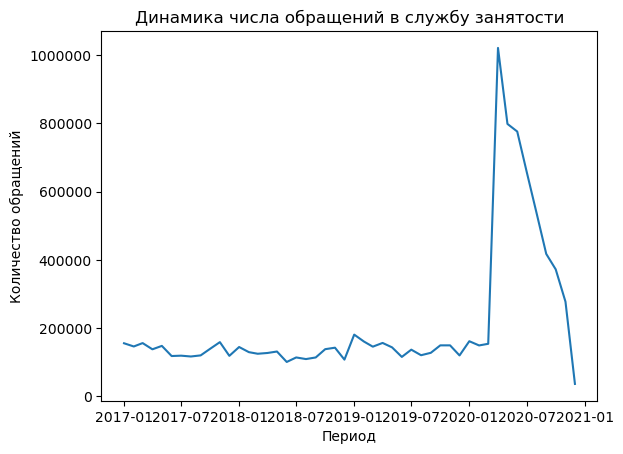

In [22]:
#группировка данных по периодам и подсчет количества обращений
periods_df = unemployed_df.groupby(['month_application'])['count'].sum().reset_index()
#построение графика
plt.plot(periods_df['month_application'], periods_df['count'])
plt.title('Динамика числа обращений в службу занятости')
plt.xlabel('Период')
plt.ylabel('Количество обращений')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

Вывод: можем наблюдать резкий скачок безработицы к середине-концу 2020 года, кол-во граждан без места работы увеличилось в 5 раз

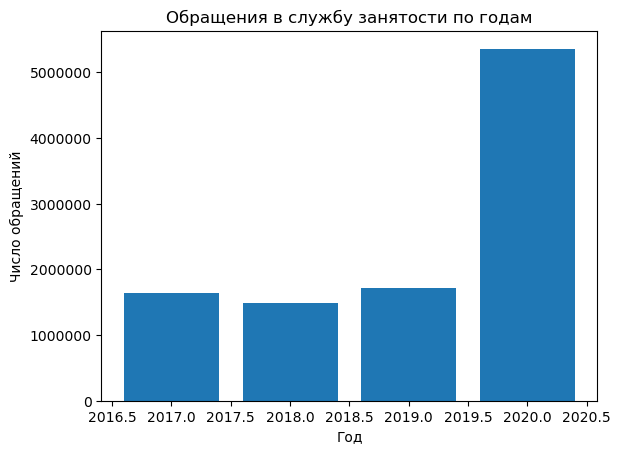

In [23]:
#группировка данных по годам и подсчет количества обращений
yearly_df = unemployed_df.groupby(['year'])['count'].sum().reset_index()
#построение диаграммы
plt.bar(yearly_df['year'], yearly_df['count'])
plt.title('Обращения в службу занятости по годам')
plt.xlabel('Год')
plt.ylabel('Число обращений')
#форматирование меток на оси y
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

Вывод: в 2020 году наблюдается резкий рост количества обращений в службу занятости

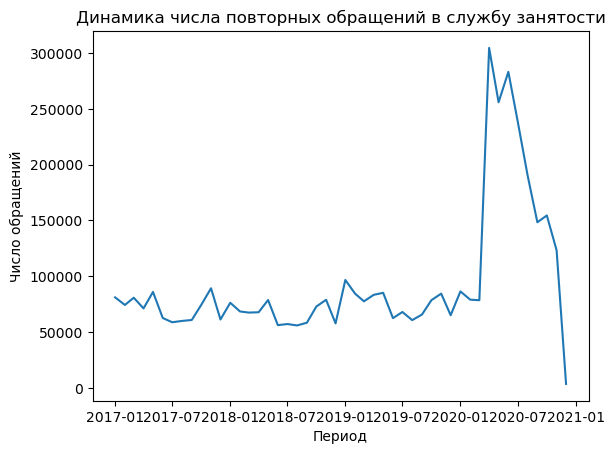

In [24]:
#группировка данных по периодам и подсчет количества повторных обращений
periods_df = unemployed_df[unemployed_df['hc_repeat']].groupby(['month_application', unemployed_df['hc_repeat']==True])['count'].sum().reset_index()
#построение графика
plt.plot(periods_df['month_application'], periods_df['count'])
plt.title('Динамика числа повторных обращений в службу занятости')
plt.xlabel('Период')
plt.ylabel('Число обращений')
plt.show()

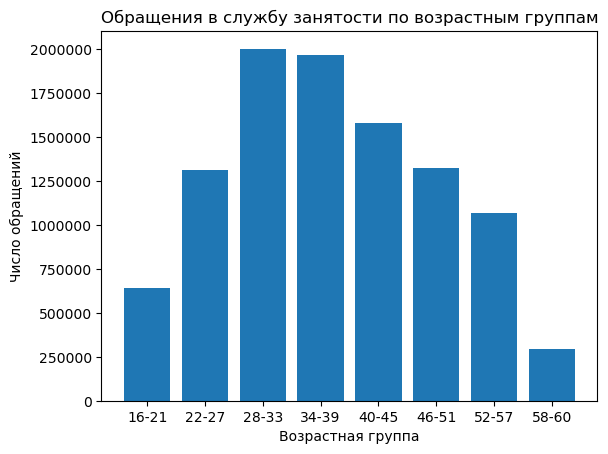

In [25]:
#группировка данных по годам и подсчет количества обращений
yearly_df = unemployed_df.groupby(['age'])['count'].sum().reset_index()
#построение диаграммы
plt.bar(yearly_df['age'], yearly_df['count'])
plt.title('Обращения в службу занятости по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Число обращений')
#форматирование меток на оси y
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

Вывод: судя по диаграмме, 28-33-летние люди в большей степени обращались в службу занятости. После этой возрастной группы люди все реже обращаются в службу, то есть чем старше становятся (после 33 лет), тем меньше

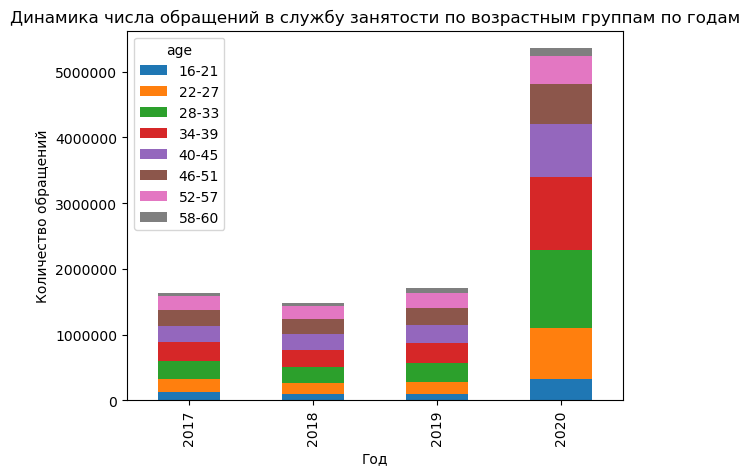

In [26]:
#группировка по году и возрастной группе
grouped_data = unemployed_df.groupby(['year', 'age']).agg({'count': 'sum'})
#вычисление суммы обращений
result = grouped_data.reset_index()
#преобразование таблицы в нужный формат
pivot_table = result.pivot_table(index='year', columns='age', values='count')
#построение диаграммы
pivot_table.plot(kind='bar', stacked=True)
#задание заголовка и меток на осях
plt.title('Динамика числа обращений в службу занятости по возрастным группам по годам')
plt.xlabel('Год')
plt.ylabel('Количество обращений')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

Вывод: в каждом году соотношение обращений по возрастным группам примерно одинаковое, за исключением 2020 года. Он отличился высоким количеством

In [27]:
#считаем кол-во трудоустроенных граждан
total_employed = unemployed_df.loc[unemployed_df['find_new_job'] == True, 'count'].sum()
employment_rate = (total_employed / unemployed_df['count'].sum()) * 100
print(total_employed)
print(employment_rate)
total_unemployed = unemployed_df['count'].sum() - total_employed

3576669
35.0990568009661


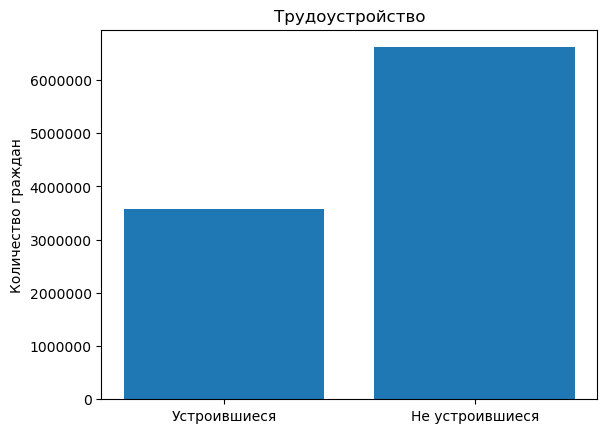

In [28]:
#строим диаграмму
labels = ['Устроившиеся', 'Не устроившиеся']
values = [total_employed, total_unemployed]
plt.bar(labels, values)
plt.title('Трудоустройство')
plt.ylabel('Количество граждан')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

Вывод: трудоустройство составляет 35%

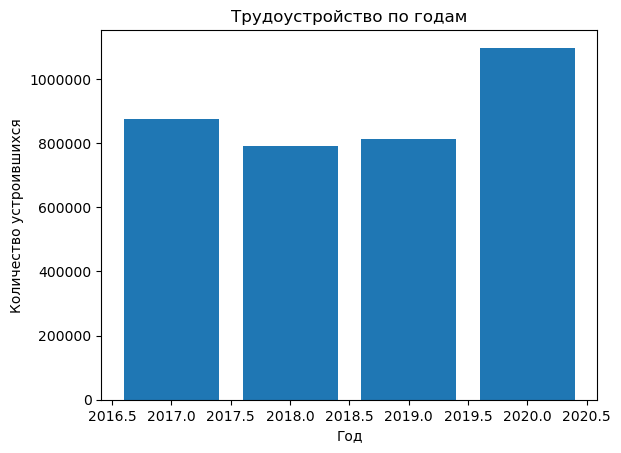

In [29]:
#группируем данные по году и суммируем количество трудоустроенных
employed_years = unemployed_df.loc[unemployed_df['find_new_job'] == True].groupby('year')['count'].sum().reset_index()
#строим столбчатую диаграмму
plt.bar(employed_years['year'], employed_years['count'])
plt.xlabel('Год')
plt.ylabel('Количество устроившихся')
plt.title('Трудоустройство по годам')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

Вывод: количество трудоустроенных не сильно колеблется в период с 2017 по 2019 год, в то время как 2020 год вновь отличился несколько резким ростом 

In [30]:
unemployed1= unemployed_df.groupby(['gender', 'education']).size()
#категоризация данных по столбцу education
unemployed_education = unemployed_df.groupby('education')['count'].sum()
#вывод самого распространенного образования у безработных:
most_common_education = unemployed_education.idxmax()
print("Самое распространенное образование у безработных: ", most_common_education)

Самое распространенное образование у безработных:  4


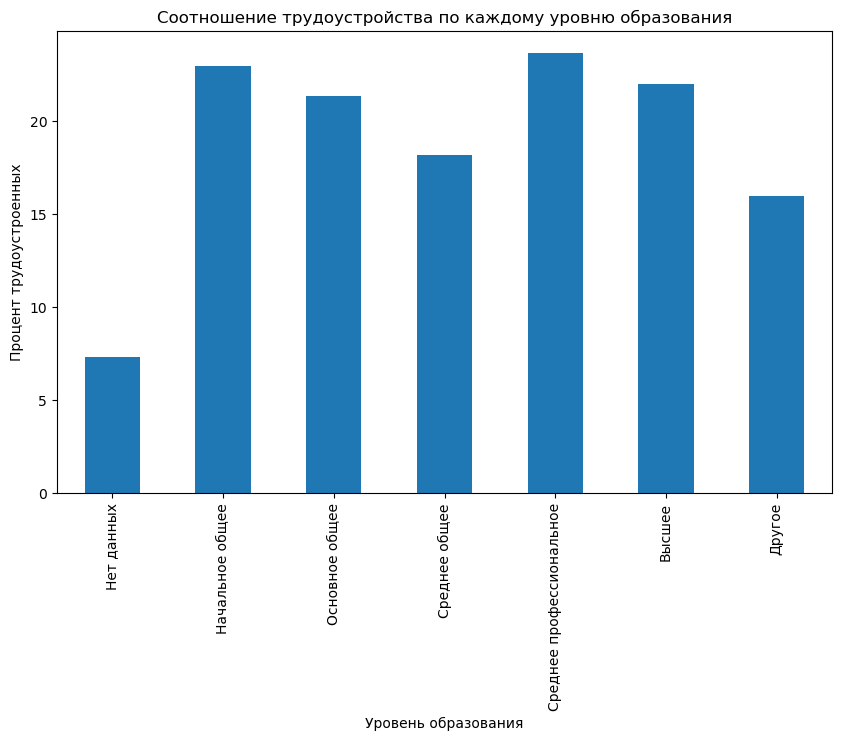

In [31]:
#группируем по уровню образования и подсчитываем среднее значение find_new_job
unemployed_by_education = unemployed_df.groupby('education').agg({'find_new_job': 'sum', 'count': 'sum'})
#построение столбчатой диаграммы
find_new_job_unemployed_by_education = unemployed_by_education['find_new_job'] / unemployed_by_education['count'] * 100
ax = find_new_job_unemployed_by_education.plot(kind='bar', figsize=(10,6))
#настройка заголовка и осей
plt.title('Соотношение трудоустройства по каждому уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Процент трудоустроенных')
ax.set_xticklabels(['Нет данных', 'Начальное общее', 'Основное общее', 'Среднее общее', 'Среднее профессиональное', 'Высшее', 'Другое'])
plt.show()

Вывод: наименьший процент трудоустройства у граждан с неизвестным образованием, а наивысший - у граждан со средним профессиональным

In [33]:
#создание среза данных за 2000 год
data_2020 = unemployed_df[unemployed_df['year']==2020]
data_2020 = data_2020[data_2020['month']!='12']

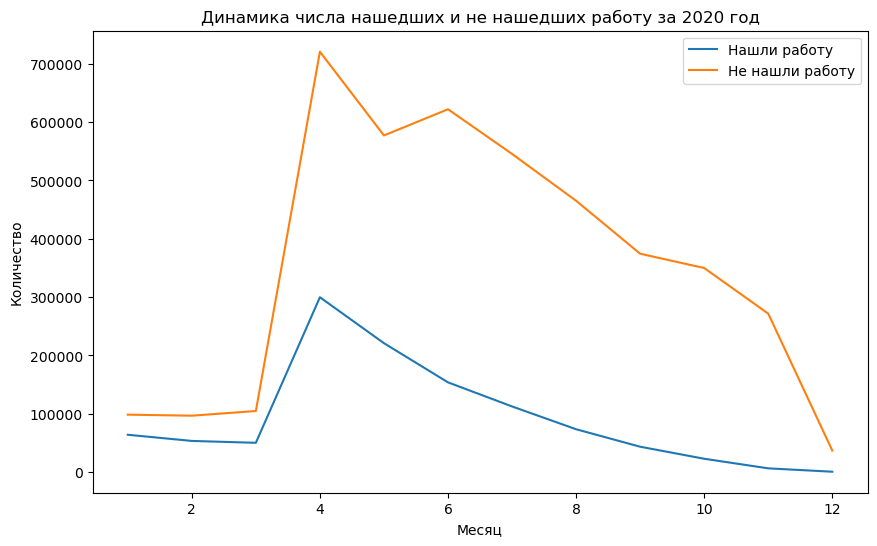

In [34]:
#датасет для первой линии (find_new_job = 1)
df_job_found = data_2020[data_2020['find_new_job'] == 1]
#датасет для второй линии (find_new_job = 0)
df_job_notfound = data_2020[data_2020['find_new_job'] == 0]
#группируем данные для первой линии
grouped_job_found = df_job_found.groupby(['month'])['count'].sum().reset_index()
grouped_job_found.columns = ['month', 'job_found_count']
#группируем данные для второй линии
grouped_job_notfound = df_job_notfound.groupby(['month'])['count'].sum().reset_index()
grouped_job_notfound.columns = ['month', 'job_notfound_count']
# объединяем два датасета
grouped = pd.merge(grouped_job_found, grouped_job_notfound, on='month', how='outer')
# строим график
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(grouped['month'], grouped['job_found_count'], label='Нашли работу')
ax.plot(grouped['month'], grouped['job_notfound_count'], label='Не нашли работу')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество')
ax.set_title('Динамика числа нашедших и не нашедших работу за 2020 год')
ax.legend()
plt.show()

Вывод: явно можно заметить, что количество людей, ненашедших работу, преобладает над числом тех, кто работу нашел. В любом месяце можно наблюдать это преобладание. Если рассмотреть динамику, то следует отметить, что пик наблюдается в обеих категориях людей примерно в одно и то же время (в четвертом месяце). Количество людей, которые нашли работу, плавно снижается с каждым последующим месяцем после пика. Число тех, кто не нашел работу, также падает, но не так плавно

In [35]:
#подсчитываем общее число людей в выборке
total_count = data_2020['count'].sum()
#группируем данные по гендерному признаку и считаем количество трудоустроенных для каждого гендера, учитывая число людей в каждой группе
data_gender = data_2020.groupby('gender')[['find_new_job', 'count']].sum()
#вычисляем процент трудоустроенных для каждого гендера
data_gender['Процент трудоустроенных'] = (data_gender['find_new_job'] / data_gender['count']) * 100

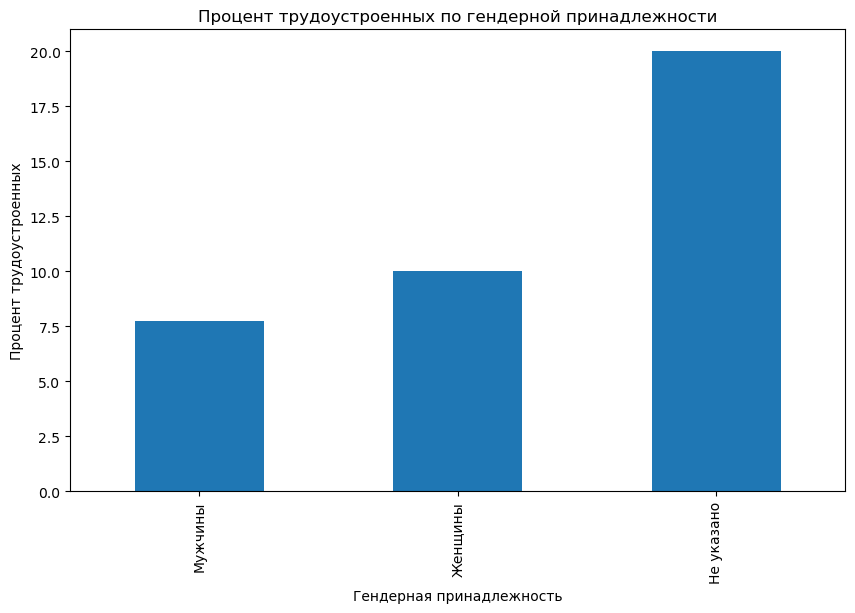

In [36]:
#построение столбчатой диаграммы
ax = data_gender['Процент трудоустроенных'].plot(kind='bar', figsize=(10,6))
#настройка заголовка и осей
ax.set_xticklabels(['Мужчины', 'Женщины', 'Не указано'])
plt.title('Процент трудоустроенных по гендерной принадлежности')
plt.xlabel('Гендерная принадлежность')
plt.ylabel('Процент трудоустроенных')
plt.show()

Вывод: процент трудоустроенных женщин больше, чем мужчин

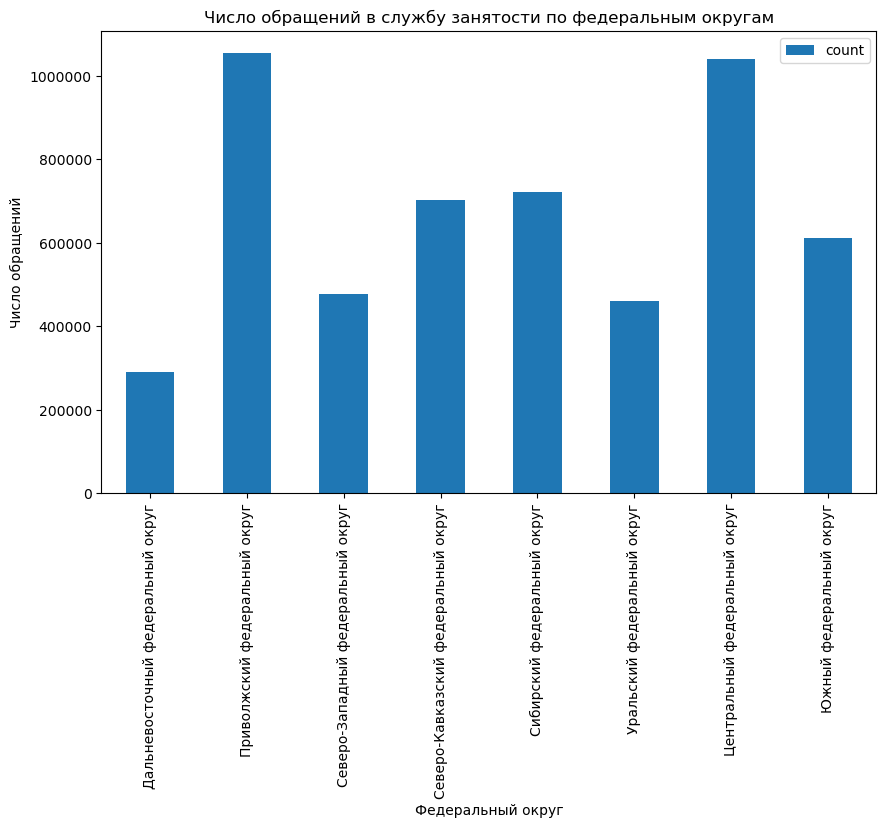

In [74]:
#группировка по федеральным округам и подсчет числа обращений
data_fo = data_2020.groupby('district')[['count']].sum()
#построение столбчатой диаграммы
data_fo.plot(kind='bar', figsize=(10,6))
#настройка заголовка и осей
plt.title('Число обращений в службу занятости по федеральным округам')
plt.xlabel('Федеральный округ')
plt.ylabel('Число обращений')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

Вывод: по числу обращении в службу занятности преобладает Приволжский федеральный округ. Недалеко от него по количеству стоит Центральный федеральный округ. Оба округа значительно отличаются от остальных (по числу людей)

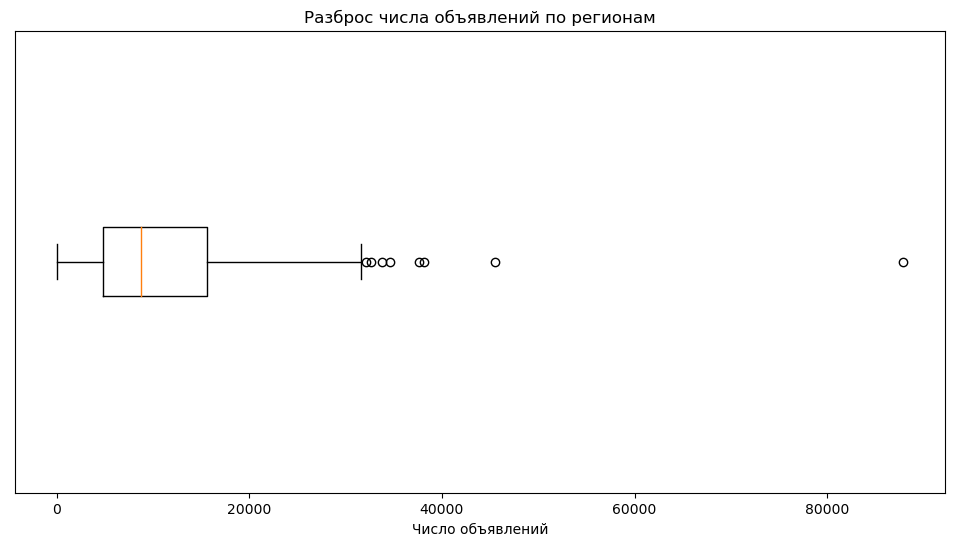

In [75]:
#фильтруем и группируем данные
df_filtered = data_2020[data_2020['find_new_job'] == True]
df_grouped = df_filtered.groupby('region', as_index=False).agg({'count': 'sum'})
# строим boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df_grouped['count'], vert=False)
plt.title('Разброс числа объявлений по регионам')
plt.xlabel('Число объявлений')
plt.yticks([], [])
plt.show()

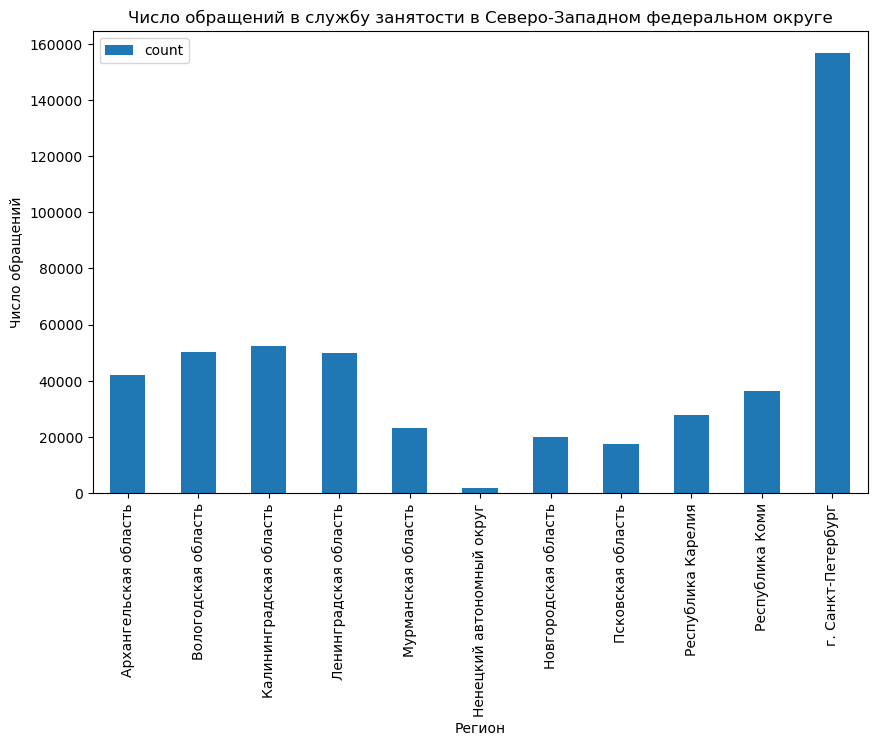

In [76]:
#группировка по регионам и подсчет числа обращений в СЗФО
data_nwfo = data_2020[data_2020['district'] == 'Северо-Западный федеральный округ']
data_nwfo = data_nwfo.groupby('region')[['count']].sum()
#построение столбчатой диаграммы
data_nwfo.plot(kind='bar', figsize=(10,6))
#настройка заголовка и осей
plt.title('Число обращений в службу занятости в Северо-Западном федеральном округе')
plt.xlabel('Регион')
plt.ylabel('Число обращений')
plt.show()

Вывод: Санкт-Петербург лидирует по числу обращений с большим отрывом по сравнению с остальными регионами. Минимальное же количество у Ненецкого автономного округа

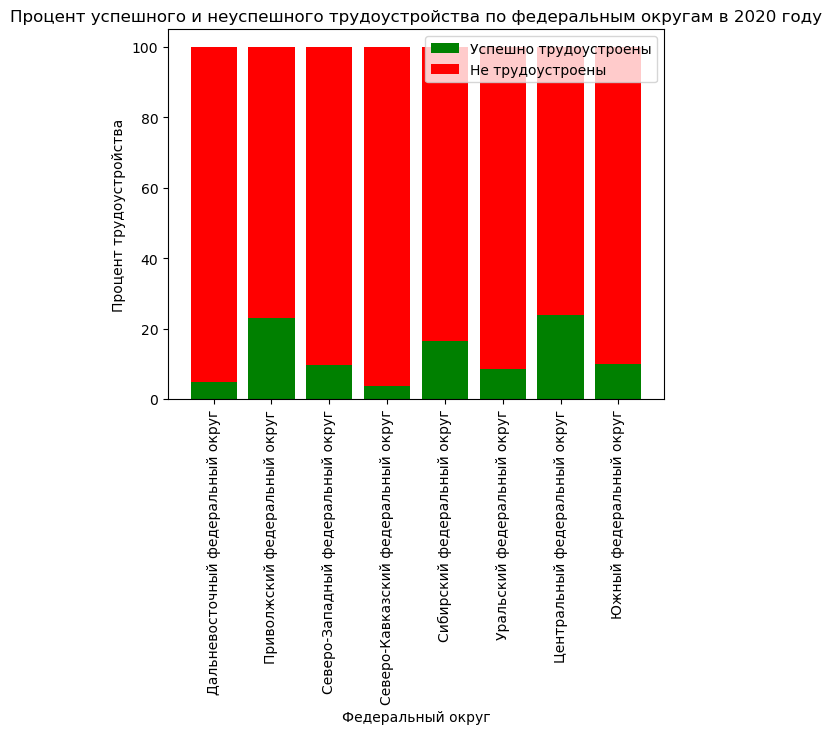

In [37]:
#фильтруем данные только для успешного трудоустройства
hired_data = data_2020[data_2020['find_new_job'] == True]
#группируем данные по федеральным округам и находим сумму успешных трудоустройств по каждому округу
districts_data = hired_data.groupby('district').agg({'count': 'sum'})
#определяем общее количество успешных трудоустройств во всех округах
total_hired = districts_data['count'].sum()
#вычисляем процент трудоустройства и неуспешного по каждому округу
districts_data['percent_hired'] = districts_data['count'] / total_hired * 100
districts_data['percent_not_hired'] = 100 - districts_data['percent_hired']
#строим столбчатую диаграмму
fig, ax = plt.subplots()
ax.bar(range(len(districts_data.index)), districts_data['percent_hired'], color='green', label='Успешно трудоустроены')
ax.bar(range(len(districts_data.index)), districts_data['percent_not_hired'], bottom=districts_data['percent_hired'], color='red', label='Не трудоустроены')
ax.set_title('Процент успешного и неуспешного трудоустройства по федеральным округам в 2020 году')
ax.set_xlabel('Федеральный округ')
ax.set_ylabel('Процент трудоустройства')
ax.set_xticks(range(len(districts_data.index)))
ax.set_xticklabels(districts_data.index, rotation=90)
ax.legend(loc='best')
plt.show()

Вывод: наибольший процент успешного трудоустройства имеет Центральный федеральный округ. На втором месте – Приволжский федеральный округ. У остальных округов процент значительно ниже

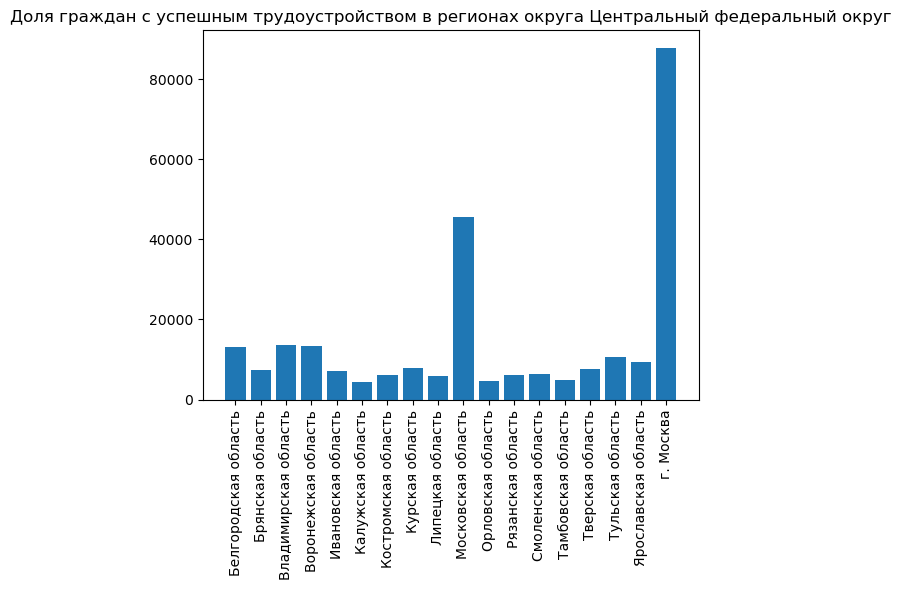

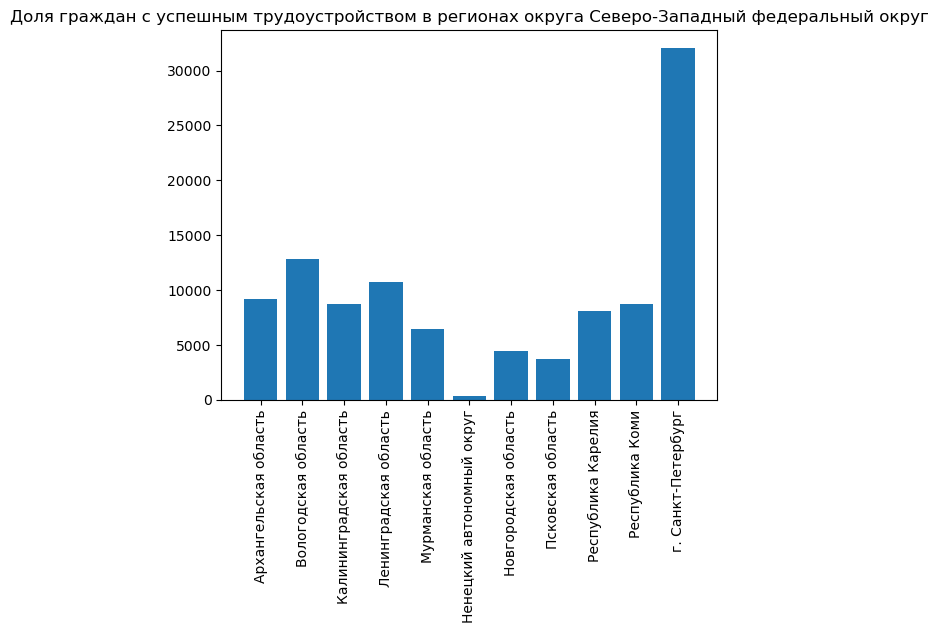

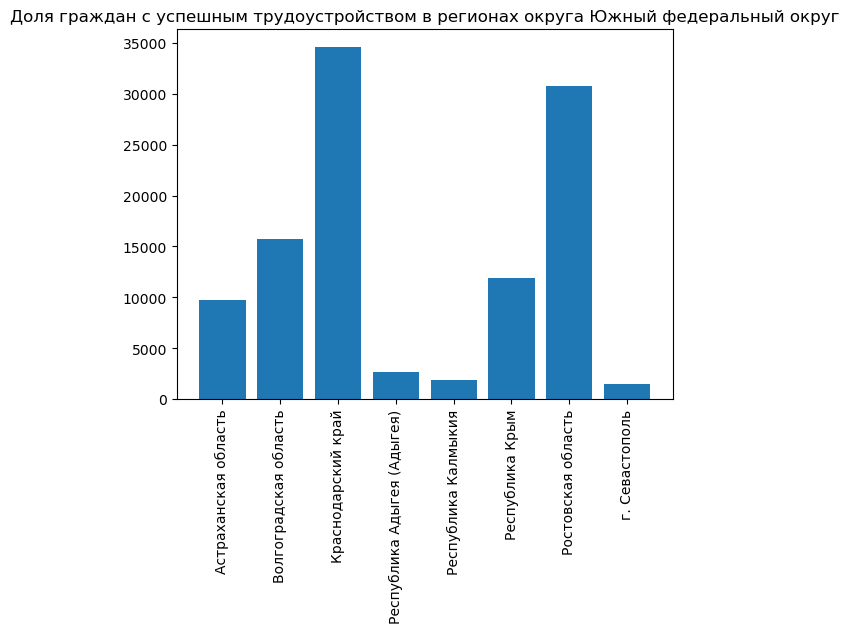

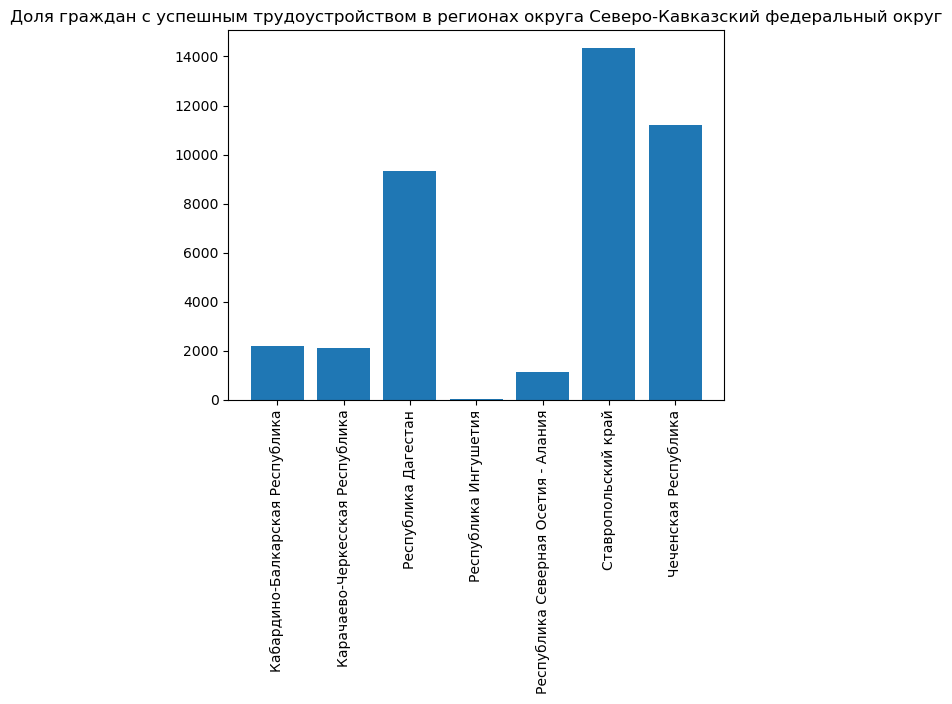

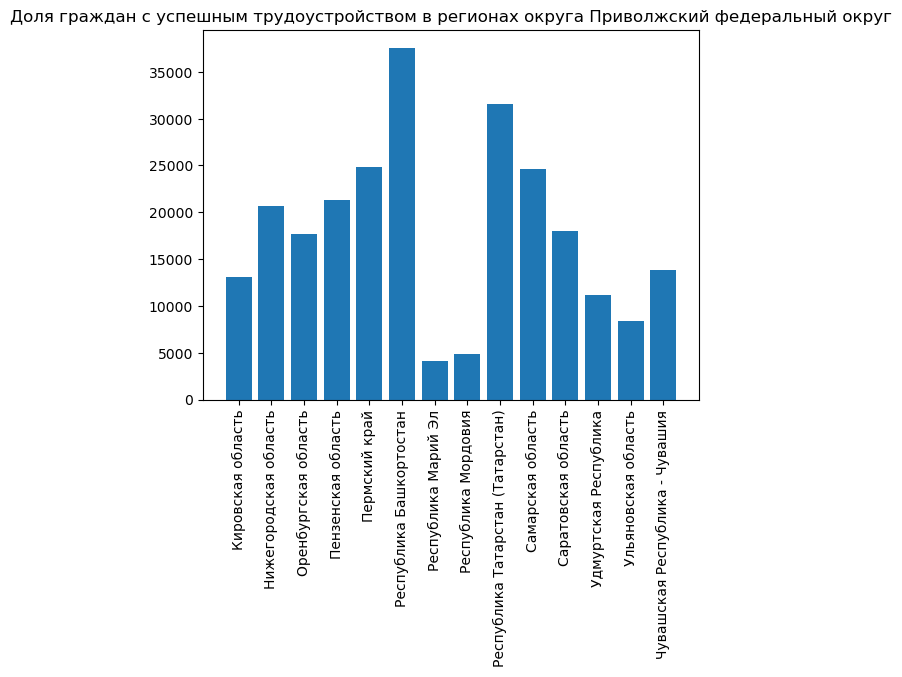

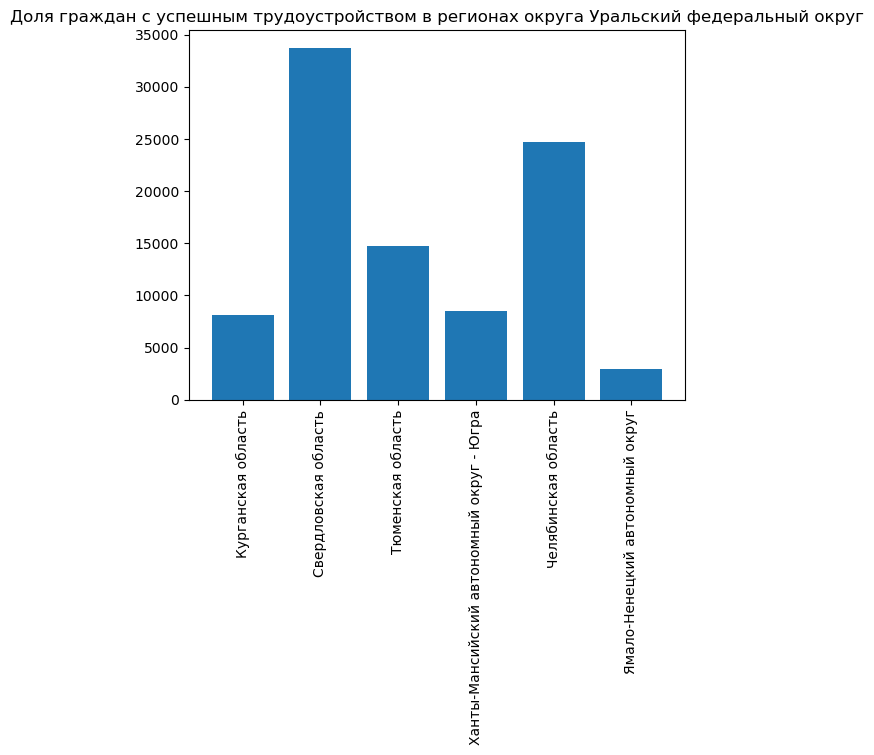

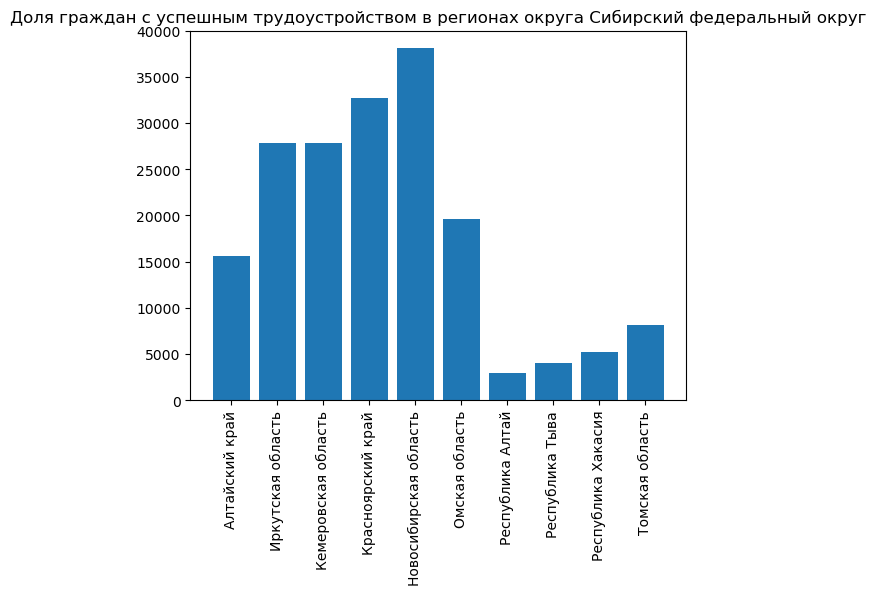

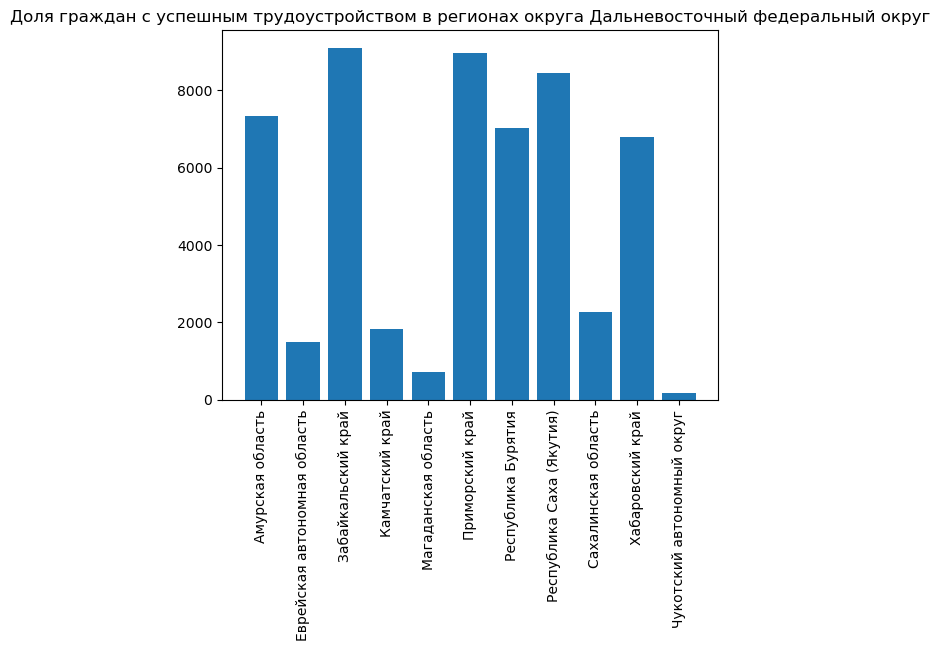

In [38]:
#создадим список федеральных округов
federal_districts = ['Центральный федеральный округ', 'Северо-Западный федеральный округ', 'Южный федеральный округ', 'Северо-Кавказский федеральный округ', 'Приволжский федеральный округ', 'Уральский федеральный округ', 'Сибирский федеральный округ', 'Дальневосточный федеральный округ']
#для каждого федерального округа
for index, district in enumerate(federal_districts):
    #отфильтруем данные только для данного округа   
    district_data = data_2020[data_2020['district'] == district]
    #создадим словарь, где ключами являются регионы, а значениями - количество граждан с успешным трудоустройством
    district_hires = dict(district_data[district_data['find_new_job'] == True].groupby('region')['count'].sum())
    #создадим список количества граждан с успешным трудоустройством по регионам    
    values = list(district_hires.values())
    #создадим список названий регионов
    labels = list(district_hires.keys())    
    #создадим объекты диаграммы    
    fig, ax = plt.subplots()
    #построим столбчатую диаграмму
    ax.bar(labels, values)
    ax.set_title(f'Доля граждан с успешным трудоустройством в регионах округа {district}')
    ax.set_xticks(range(len(labels)))  # установим местоположение меток на оси X
    ax.set_xticklabels(labels, rotation=90)  # добавляем имена регионов на ось X и поворачиваем их
    #отображаем диаграмму    
    plt.show()